# <center>[Setting Up Your Database](https://nextjs.org/learn/dashboard-app/setting-up-your-database)</center>

Before you can continue working on your dashboard, you'll need some data. In this chapter, you'll be setting up a PostgreSQL database using `@vercel/postgres`. If you're already familiar with PostgreSQL and would prefer to use your own provider, you can skip this chapter and set it up on your own. Otherwise, let's continue!

**In this chapter...**

Here are the topics we’ll cover

1. Push your project to GitHub.

2. Set up a Vercel account and link your GitHub repo for instant previews and deployments.

3. Create and link your project to a Postgres database.

4. Seed the database with initial data.

## Create a GitHub repository

To start, let's push your repository to Github if you haven't done so already. This will make it easier to set up your database and deploy.

If you need help setting up your repository, take a look at [this guide on GitHub](https://help.github.com/en/github/getting-started-with-github/create-a-repo).

Good to know:

- You can also use other Git provider like GitLab or Bitbucket.

- If you're new to GitHub, we recommend the [GitHub Desktop App](https://desktop.github.com/) for a simplified development workflow.

## Create a vercel account

Visit [vercel.com/signup](https://vercel.com/signup) to create an account. Choose the free "hobby" plan. Select **Continue with GitHub** to connect your GitHub and Vercel accounts.

## Connect and deploy your project

Next, you'll be taken to this screen where you can select and import the GitHub repository you've just created:

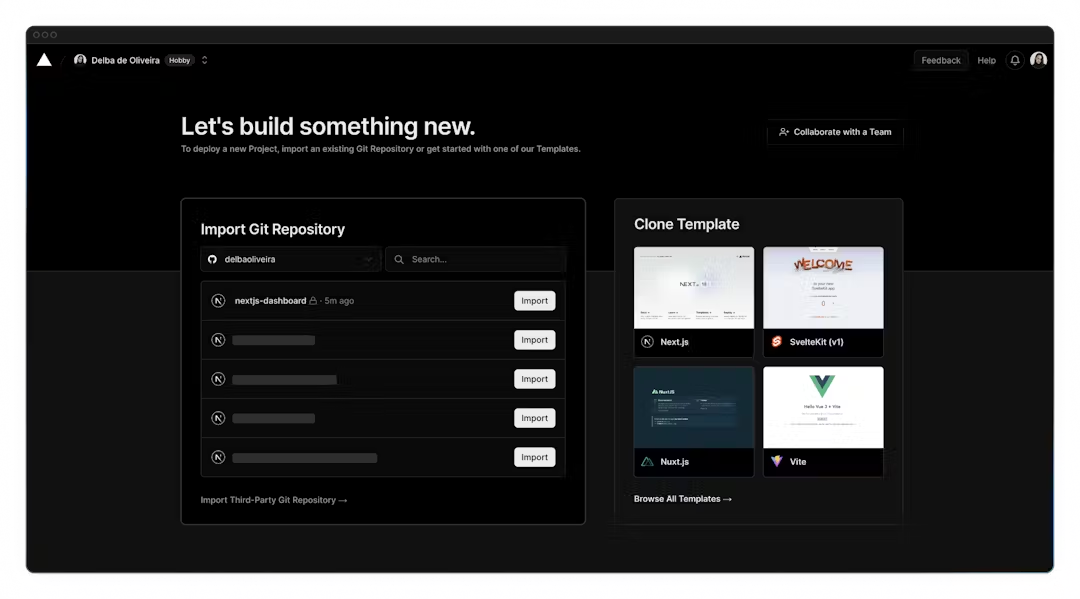

Name your project and click **Deploy**.

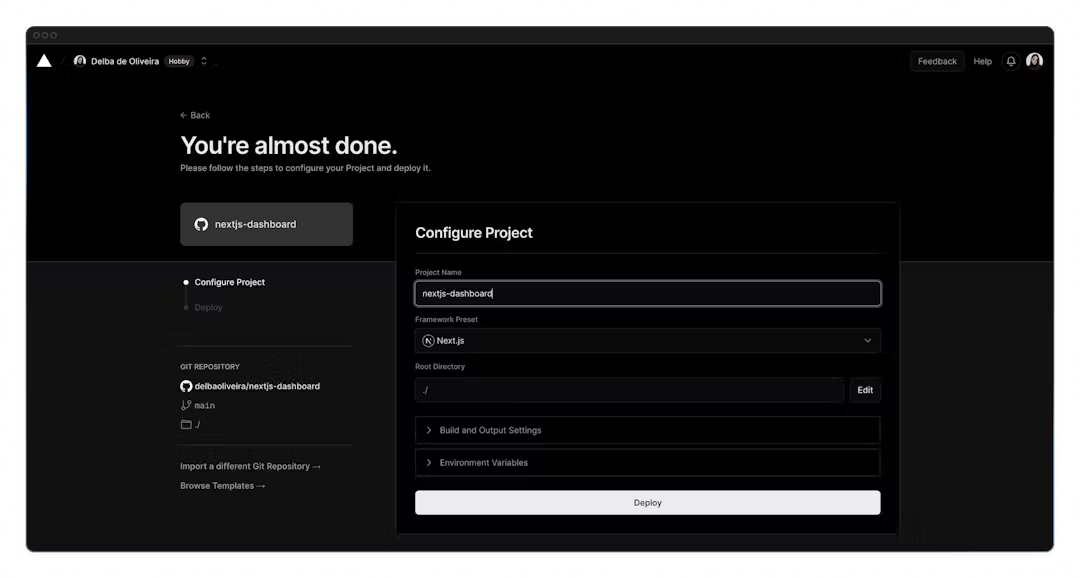

Hooray! 🎉 Your project is now deployed.

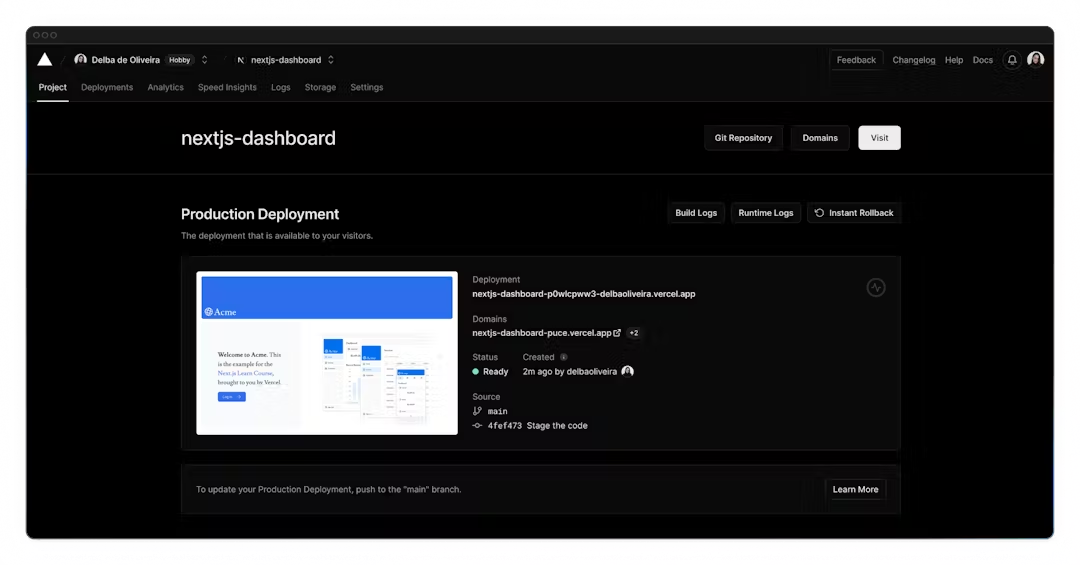

By connecting your GitHub repository, whenever you push changes to your main branch, Vercel will automatically redeploy your application with no configuration needed. When opening pull requests, you'll also have [instant previews](https://vercel.com/docs/deployments/preview-deployments#preview-urls) which allow you to catch deployment errors early and share a preview of your project with team members for feedback.

## Create a Postgres database

Next, to set up a database, click **Continue to Dashboard** and select the **Storage** tab from your project dashboard. Select **Connect Store** → **Create New** → **Postgres** → **Continue**.

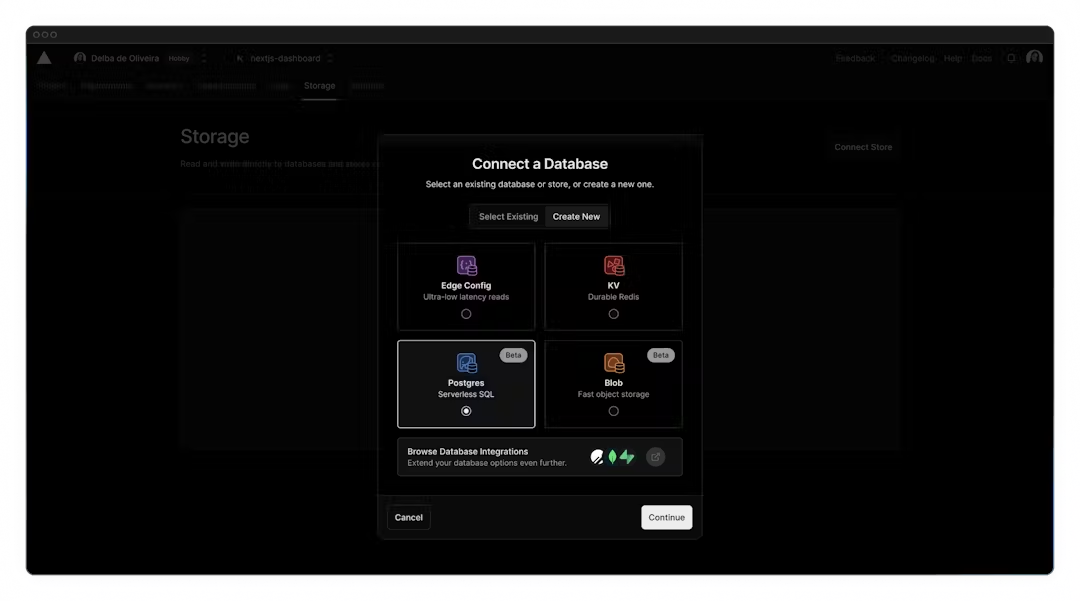

Accept the terms, assign a name to your database, and ensure your database region is set to **Washington D.C (iad1)** - this is also the [default region](https://vercel.com/docs/functions/serverless-functions/regions#select-a-default-serverless-region) for all new Vercel projects. By placing your database in the same region or close to your application code, you can reduce [latency](https://developer.mozilla.org/en-US/docs/Web/Performance/Understanding_latency) for data requests.

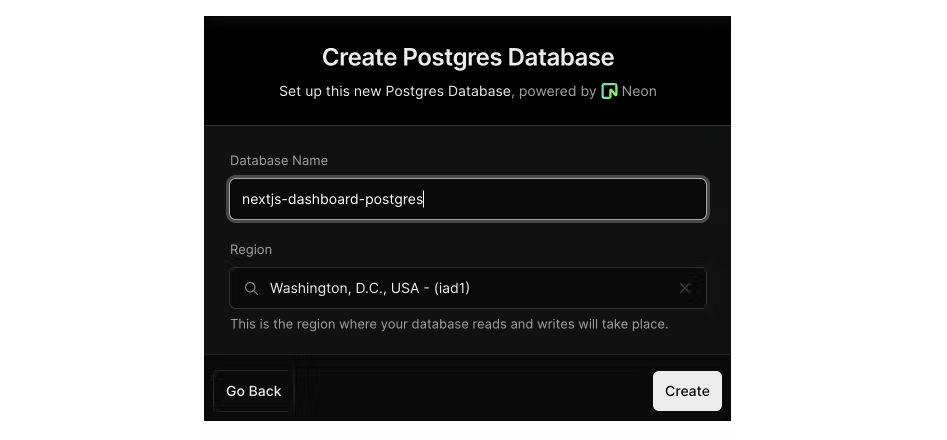

**Good to know**: You cannot change the database region once it has been initalized. If you wish to use a different [region](https://vercel.com/docs/storage/vercel-postgres/limits#supported-regions), you should set it before creating a database.

Once connected, navigate to the `.env.local` tab, click **Show secret** and **Copy Snippet**. Make sure you reveal the secrets before copying them.

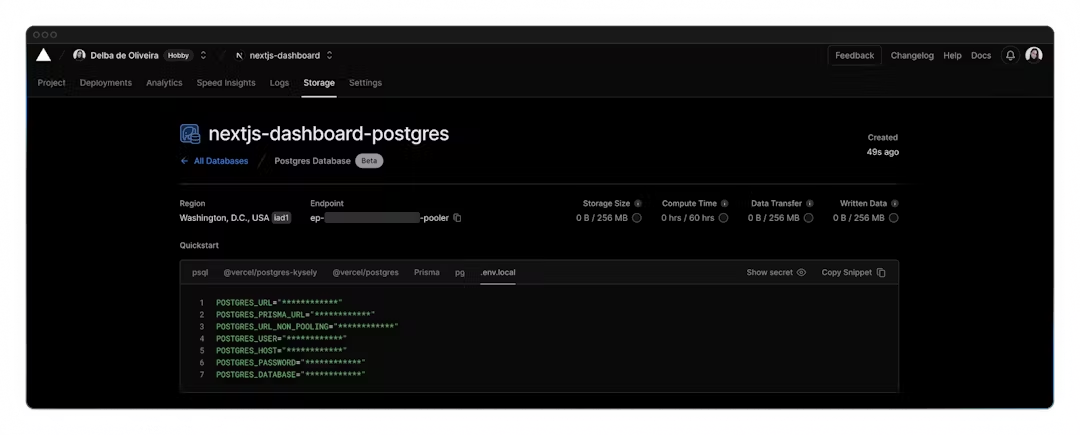

Navigate to your code editor and rename the `.env.example` file to `.env`. Paste in the copied contents from Vercel.

**Important**: Go to your `.gitignore` file and make sure `.env` is in the ignored files to prevent your database secrets from being exposed when you push to GitHub.

Finally, run `npm i @vercel/postgres` in your terminal to install the [Vercel Postgres SDK](https://vercel.com/docs/storage/vercel-postgres/sdk).

## Seed your database

Now that your database has been created, let's seed it with some initial data. This will allow you to have some data to work with as you build the dashboard.

In the `/scripts` folder of your project, there's a file called `seed.js`. This script contains the instructions for creating and seeding the `invoices`, `customers`, `user`, `revenue` tables.

Don't worry if you don't understand everything the code is doing, but to give you an overview, the script uses **SQL** to create the tables, and the data from `placeholder-data.js` file to populate them after they've been created.

Next, in your `package.json` file, add the following line to your scripts:

In [ ]:
// /package.json

"scripts": {
    // ...
    "seed": "node -r dotenv/config ./scripts/seed.js"
  },

This is the command that will execute `seed.js`.

Now, run `npm run seed`. You should see some `console.log` messages in your terminal to let you know the script is running.

**<center>It’s time to take a quiz!</center>**

<center>Test your knowledge and see what you’ve just learned.</center>

What is 'seeding' in the context of databases?

A. Deleting all data in the database

B. Importing the schema of a database

C. Populating the database with an initial set of data

D. Creating relationships between tables in a database

**Populating the database with an initial set of data**:

That's right! Seeding is useful when you want to have some data to work with as you build your application.

### Troubleshooting:

- Make sure to reveal your database secrets before copying it into your .env file.

- The script uses bcrypt to hash the user's password, if bcrypt isn't compatible with your environment, you can update the script to use [bcryptjs](https://www.npmjs.com/package/bcryptjs) instead.

- If you run into any issues while seeding your database and want to run the script again, you can drop any existing tables by running DROP TABLE tablename in your database query interface. See the [executing queries section](https://nextjs.org/learn/dashboard-app/setting-up-your-database#executing-queries) below for more details. But be careful, this command will delete the tables and all their data. It's ok to do this with your example app since you're working with placeholder data, but you shouldn't run this command in a production app.

- If you continue to experience issues while seeding your Vercel Postgres database, please open a [discussion on GitHub](https://github.com/vercel/next-learn/issues).

## Exploring your database

Let's see what your database looks like. Go back to Vercel, and click **Data** on the sidenav.

In this section, you'll find the four new tables: users, customers, invoices, and revenue.

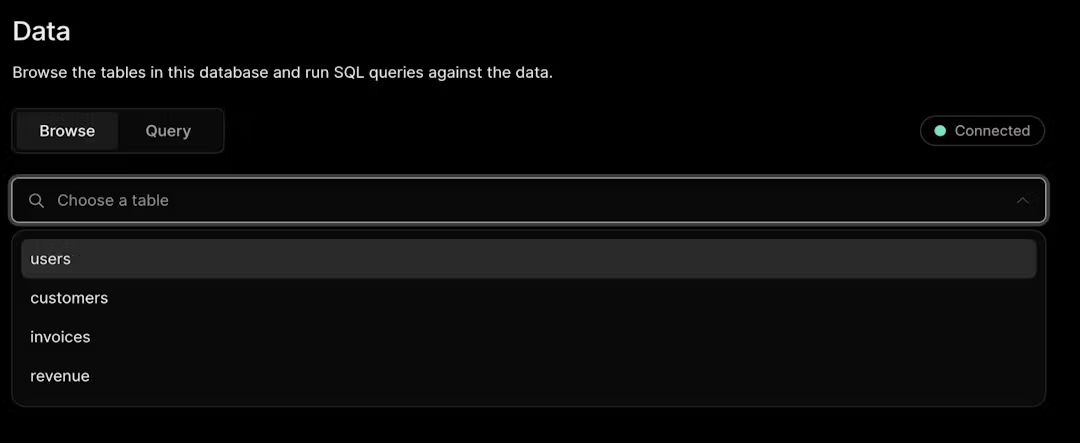

By selecting each table, you can view its records and ensure the entries align with the data from `placeholder-data.js` file.

## Executing queries

You can switch to the "query" tab to interact with your database. This section supports standard SQL commands. For instance, inputting `DROP TABLE customers` will delete "customers" table along with all its data - _**so be careful**_!

Let's run your first database query. Paste and run the following SQL code into the Vercel interface:

In [ ]:
SELECT invoices.amount, customers.name
FROM invoices
JOIN customers ON invoices.customer_id = customers.id
WHERE invoices.amount = 666;

**<center>It’s time to take a quiz!</center>**

<center>Test your knowledge and see what you’ve just learned.</center>

Which customer does this invoice belong to?


A. Lee Robinson

B. Evil Rabbit

C. Delba de Oliveira

D. Steph Dietz

**Evil Rabbit**: That's right!

## <center>You've Completed Chapter 6</center>

<center>With your database now set up and integrated, you can continue building your application.</center>

<center>
Next Up

**7: Fetching Data**

Let's discuss the different ways you can fetch data from your database, including using APIs, SQL, and alternatives.

[<button>Start Chapter 7</button>](07_Fetching_Data.ipynb)
</center>